# ML - ASSIGNMENT - 1

# Customer Churn Prediction 


## Team
### 1. SUBHAJA
### 2. VIPLAVI 
### 3. SANDEEP KUMAR JAKKARAJU 

In [53]:
### Importing all the required python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
## Reading the CSV file into a pandas data frame

df = pd.read_csv('Churn_Modelling.csv')

## print first 10 elements/records

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [56]:
## printing the descriptive statistics.

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [57]:
## checking for null values in the dataframe

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
len(df[df.duplicated()])

0

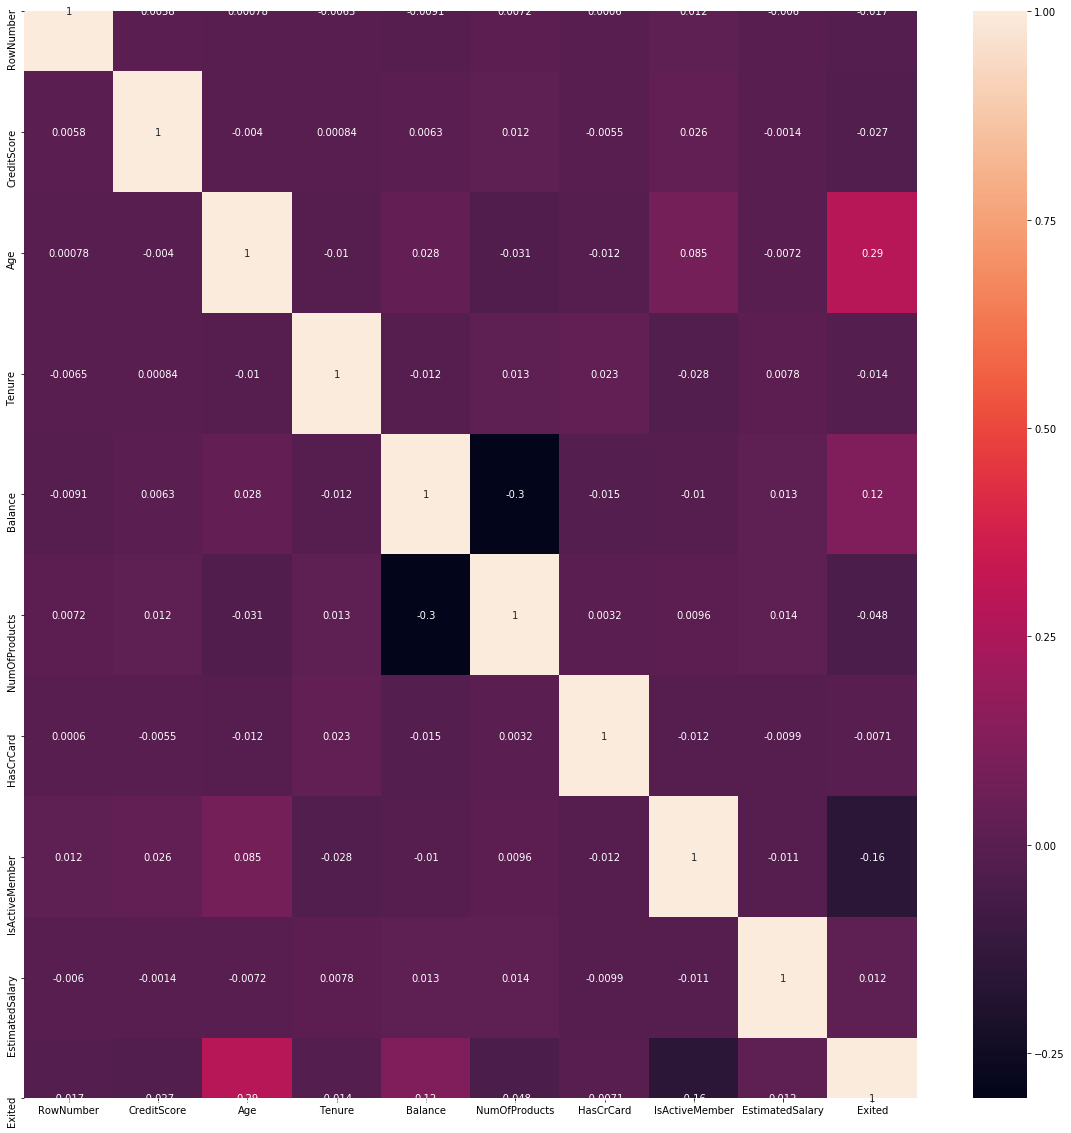

In [59]:
plt.figure(figsize=(20, 20))
corr = df.drop("CustomerId",axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [60]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [91]:
# printing class balance

df.groupby(['Exited'])['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

In [93]:
### Here we have a classic imbalanced class 80 : 20, We need to do k-fold classification

In [62]:
### LABEL encoding the categorical columns

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Geography']= label_encoder.fit_transform(df['Geography'])
df['Gender']= label_encoder.fit_transform(df['Gender'])


In [76]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [63]:
df["Geography"].head(5)

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int64

In [64]:
df['Gender'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

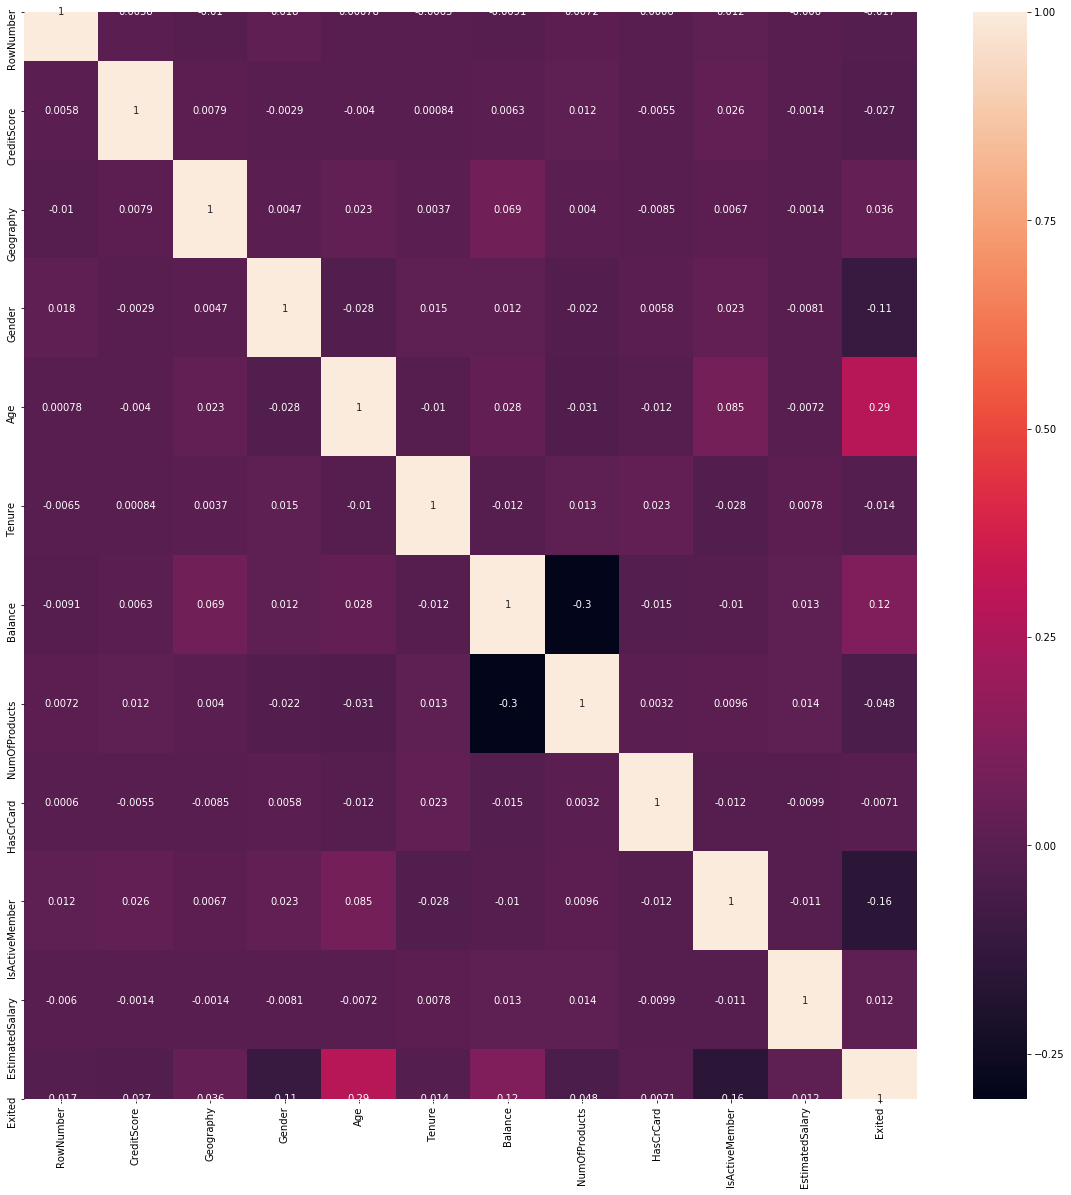

In [88]:
plt.figure(figsize=(20, 20))
corr = df.drop("CustomerId",axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [77]:
# Removing RowNumber, CustomerId, Surname column as it is redundant information

features = ['CreditScore', 'Age','Balance','NumOfProducts','HasCrCard', 'IsActiveMember','EstimatedSalary', 'Geography','Gender']
X = df[features]
y = df['Exited']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
model = LogisticRegression()

In [81]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
y_pred = model.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred)

0.8084

In [84]:
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1927,64,1991
1,415,94,509
All,2342,158,2500


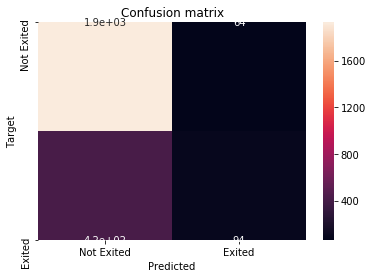

In [85]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Not Exited','Exited'], 
            yticklabels=['Not Exited','Exited'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.59      0.18      0.28       509

    accuracy                           0.81      2500
   macro avg       0.71      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500



In [94]:
X = X.as_matrix()
y = y.as_matrix()

In [95]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=20) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

20

In [98]:
from sklearn.ensemble import BaggingClassifier
best=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bg = BaggingClassifier(model,max_samples=0.5,n_estimators=10)
    bg.fit(X_train,y_train)
    y_pred = bg.predict(X_test)
    if(best < accuracy_score(y_test, y_pred)):
        best = accuracy_score(y_test, y_pred)
        best_model = bg
    print(accuracy_score(y_test, y_pred))

0.786
0.782
0.766
0.816
0.774
0.798
0.788
0.782
0.79
0.794
0.798
0.794
0.788
0.808
0.798
0.788
0.766
0.808
0.808
0.82


In [99]:
best_model

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, 

In [100]:
## Best Accuracy
print(best)

0.82
